## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

Text(0, 0.5, 'Viewership (Millions)')

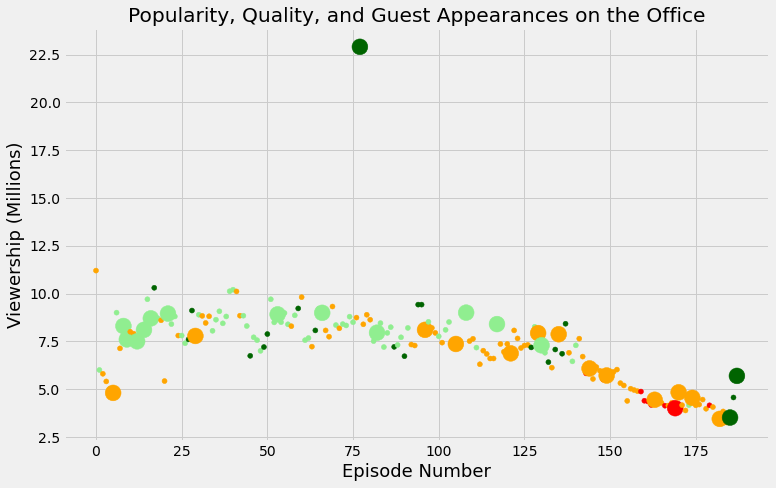

In [31]:
# data reading 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("datasets/office_episodes.csv",parse_dates=['release_date'])


#creating color schemes
customer_ratings=[]
for index,rows in df.iterrows():
    if rows['scaled_ratings']< 0.25:
        customer_ratings.append('red')
    elif rows['scaled_ratings']>=0.25 and rows['scaled_ratings']<0.50:
        customer_ratings.append('orange')
    elif rows['scaled_ratings']>=0.50 and rows['scaled_ratings']<0.75:
        customer_ratings.append('lightgreen')
    else :
        customer_ratings.append('darkgreen')

        
# Iterating  through the DataFrame, and assign a size based on whether it has guests        
size_new = [250 if guest else 25 for guest in df['has_guests']]


#creating plots
fig = plt.figure()
plt.scatter(x=df["episode_number"],y=df["viewership_mil"],c=customer_ratings,s=size_new)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
# Create an x-axis label
plt.xlabel("Episode Number", fontsize=18)

# Create a y-axis label
plt.ylabel("Viewership (Millions)", fontsize=18)

    

In [33]:
max_viewwership=df["viewership_mil"].max()
print(df[df['viewership_mil']==max_viewwership]['guest_stars'])
top_star="Jack Black"

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object
